In [1]:
print("helloworld")

helloworld


In [2]:
import math
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pandas_datareader as web
import pandas as pd 
import numpy  as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
print("done")

done


In [3]:
df= web.DataReader("Meta",data_source='yahoo',start='2010-10-28',end='2022-10-28')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2022-10-24,133.479996,124.570000,127.250000,129.720001,63563400,129.720001
2022-10-25,138.350006,130.589996,130.880005,137.509995,38433200,137.509995
2022-10-26,135.550003,128.529999,131.679993,129.820007,82791500,129.820007


In [4]:
df.shape

(2630, 6)

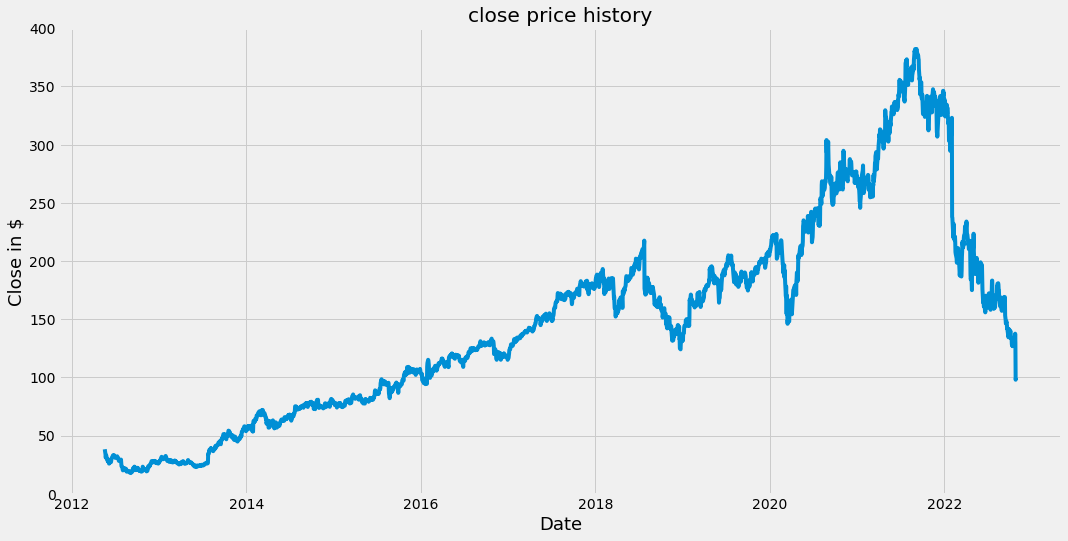

In [5]:
plt.figure(figsize=(16,8))
plt.title("close price history")
plt.plot(df['Close'])
plt.ylabel("Close in $",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.show()

In [6]:
close= df['Close'].values
close

array([ 38.22999954,  34.02999878,  31.        , ..., 129.82000732,
        97.94000244,  99.19999695])

In [7]:
len_of_train= math.ceil(.8*len(close))
len_of_train

2104

In [8]:
scaler= MinMaxScaler(feature_range=(0,1))
close=close.reshape(-1,1)
scaled_close= scaler.fit_transform(close)


In [9]:
train_data= scaled_close[0:len_of_train,:]

x_train=[]
y_train=[]
for i in range(60,len_of_train):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train,y_train= np.array(x_train),np.array(y_train)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2044, 60, 1)

In [11]:
from re import L


model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
model.compile(optimizer='adam',loss="mean_squared_error")
history= model.fit(x_train,y_train,batch_size=1,epochs=1)


2044/2044 [==============================] - 42s 20ms/step - loss: 6.9793e-04


In [13]:
from dataclasses import dataclass


y_test=close[len_of_train:,:]
x_test=[]
test_data=scaled_close[len_of_train-60:,:]

for i in range(60,test_data.shape[0]):
    x_test.append(test_data[i-60:i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(526, 60, 1)

In [14]:
y_pred= model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)


In [15]:
rmse= np.sqrt(np.mean((y_pred-y_test)**2))
rmse

11.013843672802075

In [16]:
train=df[:len_of_train]
valid=df[len_of_train:]
valid["Prediction"]=y_pred

C:\Users\DELL\AppData\Local\Temp\ipykernel_40144\2982964390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"]=y_pred


In [17]:
valid

,High,Low,Open,Close,Volume,Adj Close,Prediction
Date,,,,,,,
2020-09-29,263.329987,256.899994,257.809998,261.790009,20200200,261.790009,254.082886
2020-09-30,266.079987,260.100006,261.980011,261.899994,20142500,261.899994,255.725616
2020-10-01,268.329987,264.799988,265.350006,266.630005,20009800,266.630005,257.725372
2020-10-02,265.149994,259.179993,261.209991,259.940002,16367600,259.940002,260.349823
2020-10-05,264.869995,260.839996,262.200012,264.649994,12822300,264.649994,261.923523
...,...,...,...,...,...,...,...
2022-10-24,133.479996,124.570000,127.250000,129.720001,63563400,129.720001,131.163315
2022-10-25,138.350006,130.589996,130.880005,137.509995,38433200,137.509995,130.940826
2022-10-26,135.550003,128.529999,131.679993,129.820007,82791500,129.820007,131.645615


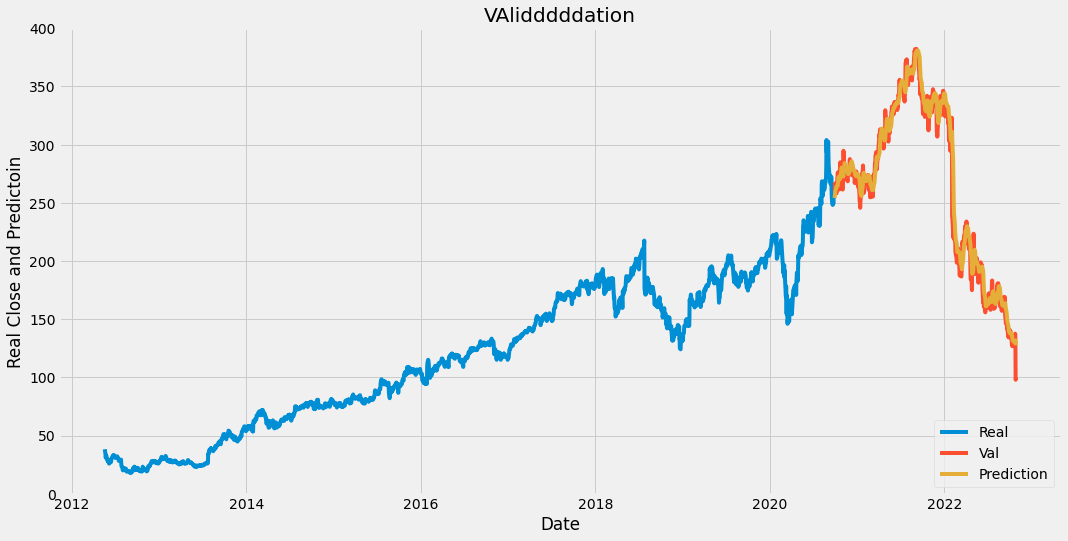

In [18]:
plt.figure(figsize=(16,8))
plt.title("VAlidddddation")
plt.xlabel("Date")
plt.ylabel("Real Close and Predictoin")
plt.plot(train['Close'])
plt.plot(valid[["Close","Prediction"]])
plt.legend(["Real","Val","Prediction"],loc="lower right")
plt.show()